# Simulating matches from vlr.gg statistics

For the data scraping, check the following repository: https://github.com/jufs128/scraping_vlr

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import poisson

## Reading the matches and map databases

In [ ]:
map_df = pd.read_csv('maps.csv')
map_df.head()

,Unnamed: 0,Match_URL,Map_Name,Map_ID,Duration,Pick,Team_1,URL_1,Score_1,Attacking_Score_1,Defending_Score_1,Team_2,URL_2,Score_2,Attacking_Score_2,Defending_Score_2
0,0,/226857/ebro-gaming-vs-oxen-challengers-league...,Bind,134027,1:00:57,2,EBRO Gaming,/team/7695/ebro-gaming,13,7,5,OXEN,/team/9427/oxen,15,7,5
1,1,/226857/ebro-gaming-vs-oxen-challengers-league...,Ascent,134028,50:50,1,EBRO Gaming,/team/7695/ebro-gaming,11,5,6,OXEN,/team/9427/oxen,13,6,7
2,2,/226857/ebro-gaming-vs-oxen-challengers-league...,Fracture,134029,29:22,2,EBRO Gaming,/team/7695/ebro-gaming,5,2,3,OXEN,/team/9427/oxen,13,3,10
3,3,/230452/enterprise-esports-vs-mandatory-champi...,Haven,134366,43:03,0,Enterprise Esports,/team/876/enterprise-esports,8,2,6,Mandatory,/team/7967/mandatory,13,6,7
4,4,/230451/mandatory-vs-team-queso-champions-tour...,Haven,134365,37:18,0,Mandatory,/team/7967/mandatory,6,3,3,Team Queso,/team/4538/team-queso,13,9,4


In [ ]:
match_df = pd.read_csv('matches.csv')
match_df.head()

,Unnamed: 0,Match_URL,Tournament,Team_1,Score_1,Team_2,Score_2
0,0,/226857/ebro-gaming-vs-oxen-challengers-league...,Challengers League LATAM South FiRe: Relegation,EBRO Gaming,0,OXEN,3
1,1,/230452/enterprise-esports-vs-mandatory-champi...,Champions Tour 2023 EMEA: Ascension,Enterprise Esports,8,Mandatory,13
2,2,/230451/mandatory-vs-team-queso-champions-tour...,Champions Tour 2023 EMEA: Ascension,Mandatory,6,Team Queso,13
3,3,/230446/team-raad-vs-gmt-esports-champions-tou...,Champions Tour 2023 EMEA: Ascension,Team RA'AD,11,GMT Esports,13
4,4,/230449/gtz-esports-vs-s2g-esports-champions-t...,Champions Tour 2023 EMEA: Ascension,GTZ Esports,13,S2G Esports,11


### Here, we filter for the franchise's 2023 tournaments

In [ ]:
match_df = match_df[(match_df['Tournament'] == 'Champions Tour 2023: Masters Tokyo') | (match_df['Tournament'] == 'Champions Tour 2023: Americas League') | (match_df['Tournament'] == 'Champions Tour 2023: EMEA League') |
           (match_df['Tournament'] == 'Champions Tour 2023: Pacific League') | (match_df['Tournament'] == 'Champions Tour 2023: LOCK//IN São Paulo') | (match_df['Tournament'] == 'Valorant Champions Tour Stage 2: Masters Copenhagen') |
           (match_df['Tournament'] == 'Valorant Champions Tour Stage 1: Masters Reykjavík') | (match_df['Tournament'] == 'Champions Tour 2023: LOCK//IN São Paulo') | (match_df['Tournament'] == 'Valorant Champions Tour Stage 2: Masters Copenhagen') |
           (match_df['Tournament'] == 'Champions Tour 2023: Pacific League')]
match_df.head()

,Unnamed: 0,Match_URL,Tournament,Team_1,Score_1,Team_2,Score_2
12,12,/220453/nrg-esports-vs-paper-rex-champions-tou...,Champions Tour 2023: Masters Tokyo,NRG Esports,1,Paper Rex,2
13,13,/220447/fnatic-vs-evil-geniuses-champions-tour...,Champions Tour 2023: Masters Tokyo,FNATIC,2,Evil Geniuses,1
14,14,/220452/paper-rex-vs-edward-gaming-champions-t...,Champions Tour 2023: Masters Tokyo,Paper Rex,2,EDward Gaming,1
15,15,/220451/team-liquid-vs-nrg-esports-champions-t...,Champions Tour 2023: Masters Tokyo,Team Liquid,1,NRG Esports,2
16,16,/220445/paper-rex-vs-fnatic-champions-tour-202...,Champions Tour 2023: Masters Tokyo,Paper Rex,0,FNATIC,2


In [ ]:
match_df['Tournament'].unique()

array(['Champions Tour 2023: Masters Tokyo',
       'Champions Tour 2023: Americas League',
       'Champions Tour 2023: EMEA League',
       'Champions Tour 2023: Pacific League',
       'Champions Tour 2023: LOCK//IN São Paulo',
       'Valorant Champions Tour Stage 2: Masters Copenhagen',
       'Valorant Champions Tour Stage 1: Masters Reykjavík'], dtype=object)

In [ ]:
map_df.head()

,Unnamed: 0,Match_URL,Map_Name,Map_ID,Duration,Pick,Team_1,URL_1,Score_1,Attacking_Score_1,Defending_Score_1,Team_2,URL_2,Score_2,Attacking_Score_2,Defending_Score_2
0,0,/226857/ebro-gaming-vs-oxen-challengers-league...,Bind,134027,1:00:57,2,EBRO Gaming,/team/7695/ebro-gaming,13,7,5,OXEN,/team/9427/oxen,15,7,5
1,1,/226857/ebro-gaming-vs-oxen-challengers-league...,Ascent,134028,50:50,1,EBRO Gaming,/team/7695/ebro-gaming,11,5,6,OXEN,/team/9427/oxen,13,6,7
2,2,/226857/ebro-gaming-vs-oxen-challengers-league...,Fracture,134029,29:22,2,EBRO Gaming,/team/7695/ebro-gaming,5,2,3,OXEN,/team/9427/oxen,13,3,10
3,3,/230452/enterprise-esports-vs-mandatory-champi...,Haven,134366,43:03,0,Enterprise Esports,/team/876/enterprise-esports,8,2,6,Mandatory,/team/7967/mandatory,13,6,7
4,4,/230451/mandatory-vs-team-queso-champions-tour...,Haven,134365,37:18,0,Mandatory,/team/7967/mandatory,6,3,3,Team Queso,/team/4538/team-queso,13,9,4


# Score by map

Comparing the distribution of scores on attack and defense on Ascent. Checking similarity to Poisson distribution.

In [ ]:
maps = map_df['Map_Name'].unique()
maps_id = {}
for i in range(len(maps)):
    maps_id[maps[i]] = i

maps_id

{'Bind': 0,
 'Ascent': 1,
 'Fracture': 2,
 'Haven': 3,
 'Split': 4,
 'Pearl': 5,
 'Lotus': 6,
 'Icebox': 7,
 'Breeze': 8}

In [ ]:
map_score = map_df[map_df['Map_Name'] == 'Ascent'].groupby(['Attacking_Score_1'])['Attacking_Score_1'].count()
df_map_attack = pd.DataFrame(data={'Score': map_score.index, 'Count': [map_score[i] for i in map_score.index]})

map_score = map_df[map_df['Map_Name'] == 'Ascent'].groupby(['Attacking_Score_2'])['Attacking_Score_2'].count()
df_map_attack = pd.concat([df_map_attack, pd.DataFrame(data={'Score': map_score.index, 'Count': [map_score[i] for i in map_score.index]})]).groupby(['Score'], as_index=False).agg('sum')

df_map_attack

,Score,Count
0,0,90
1,1,166
2,2,294
3,3,401
4,4,507
5,5,475
6,6,416
7,7,340
8,8,258
9,9,166


In [ ]:
map_score = map_df[map_df['Map_Name'] == 'Ascent'].groupby(['Defending_Score_1'])['Defending_Score_1'].count()
df_map_defense = pd.DataFrame(data={'Score': map_score.index, 'Count': [map_score[i] for i in map_score.index]})

map_score = map_df[map_df['Map_Name'] == 'Ascent'].groupby(['Defending_Score_2'])['Defending_Score_2'].count()
df_map_defense = pd.concat([df_map_defense, pd.DataFrame(data={'Score': map_score.index, 'Count': [map_score[i] for i in map_score.index]})]).groupby(['Score'], as_index=False).agg('sum')

df_map_defense

,Score,Count
0,0,96
1,1,140
2,2,216
3,3,331
4,4,445
5,5,467
6,6,440
7,7,372
8,8,325
9,9,232


In [ ]:
for score in df_map_defense['Score'].values:
    if score not in df_map_attack['Score'].values:
        df_map_attack.loc[len(df_map_attack.index)] = [score, 0]

for score in df_map_attack['Score'].values:
    if score not in df_map_defense['Score'].values:
        df_map_defense.loc[len(df_map_defense.index)] = [score, 0]

df_map_attack.sort_values('Score', inplace=True)
df_map_defense.sort_values('Score', inplace=True)

In [ ]:
mean_attack = 0
for row in df_map_attack.iterrows():
    mean_attack += row[1]['Score']*row[1]['Count']

mean_attack /= np.sum(df_map_attack['Count'])

mean_defense = 0
for row in df_map_defense.iterrows():
    mean_defense += row[1]['Score']*row[1]['Count']

mean_defense /= np.sum(df_map_defense['Count'])

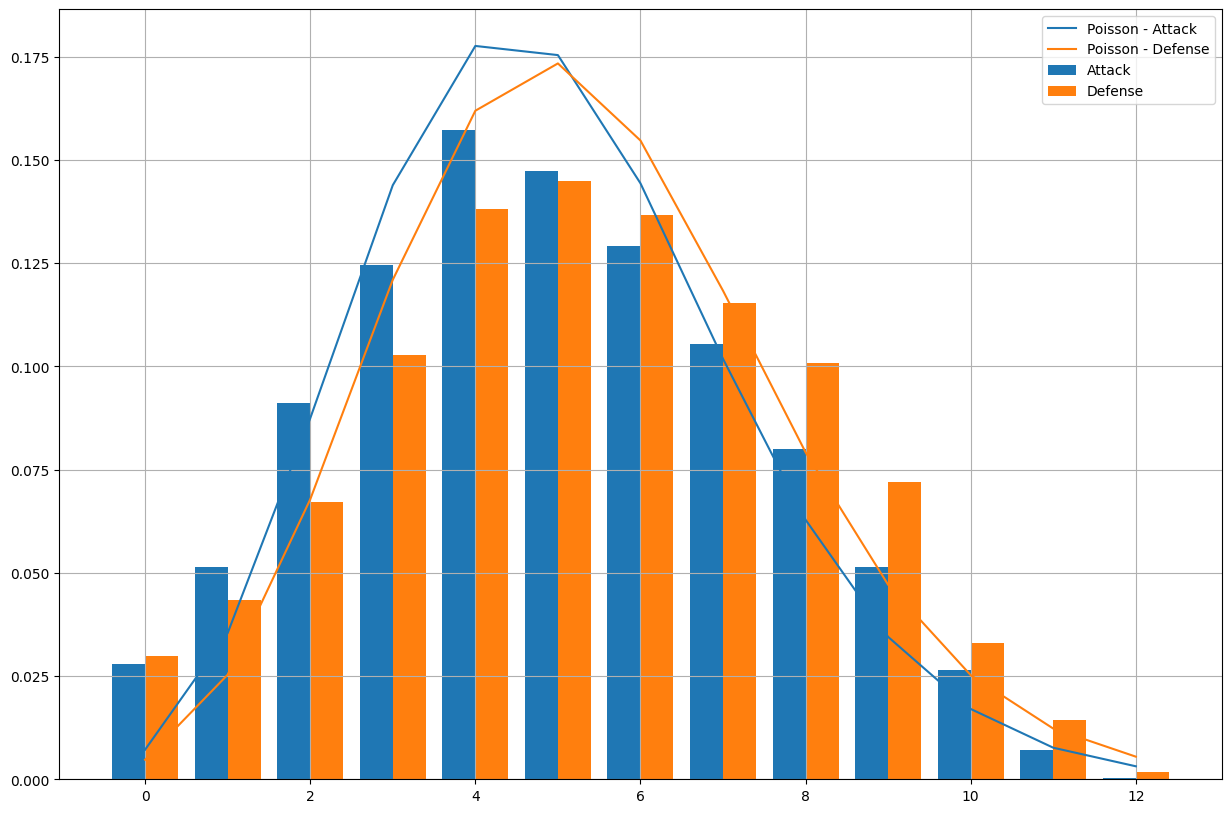

In [ ]:
plt.figure(figsize=(15,10))

plt.bar(df_map_attack['Score']- 0.2, (df_map_attack['Count'])/np.sum(df_map_attack['Count']), 0.4, label='Attack')
plt.bar(df_map_defense['Score']+ 0.2, (df_map_defense['Count'])/np.sum(df_map_defense['Count']), 0.4, label='Defense')

plt.plot(df_map_defense['Score'], poisson.pmf(df_map_attack['Score'], mu=mean_attack), label='Poisson - Attack')
plt.plot(df_map_defense['Score'], poisson.pmf(df_map_defense['Score'], mu=mean_defense), label='Poisson - Defense')

plt.legend()
plt.grid()

In [ ]:
map_df['Rate_Attacking_Score_1'] = map_df['Attacking_Score_1']/(map_df['Attacking_Score_1'] + map_df['Defending_Score_2'])
map_df['Rate_Defending_Score_2'] = map_df['Defending_Score_2']/(map_df['Attacking_Score_1'] + map_df['Defending_Score_2'])
map_df['Rate_Attacking_Score_2'] = map_df['Attacking_Score_2']/(map_df['Attacking_Score_2'] + map_df['Defending_Score_1'])
map_df['Rate_Defending_Score_1'] = map_df['Defending_Score_1']/(map_df['Attacking_Score_2'] + map_df['Defending_Score_1'])
map_df

,Unnamed: 0,Match_URL,Map_Name,Map_ID,Duration,Pick,Team_1,URL_1,Score_1,Attacking_Score_1,Defending_Score_1,Team_2,URL_2,Score_2,Attacking_Score_2,Defending_Score_2,Rate_Attacking_Score_1,Rate_Defending_Score_2,Rate_Attacking_Score_2,Rate_Defending_Score_1
0,0,/226857/ebro-gaming-vs-oxen-challengers-league...,Bind,134027,1:00:57,2,EBRO Gaming,/team/7695/ebro-gaming,13,7,5,OXEN,/team/9427/oxen,15,7,5,0.583333,0.416667,0.583333,0.416667
1,1,/226857/ebro-gaming-vs-oxen-challengers-league...,Ascent,134028,50:50,1,EBRO Gaming,/team/7695/ebro-gaming,11,5,6,OXEN,/team/9427/oxen,13,6,7,0.416667,0.583333,0.500000,0.500000
2,2,/226857/ebro-gaming-vs-oxen-challengers-league...,Fracture,134029,29:22,2,EBRO Gaming,/team/7695/ebro-gaming,5,2,3,OXEN,/team/9427/oxen,13,3,10,0.166667,0.833333,0.500000,0.500000
3,3,/230452/enterprise-esports-vs-mandatory-champi...,Haven,134366,43:03,0,Enterprise Esports,/team/876/enterprise-esports,8,2,6,Mandatory,/team/7967/mandatory,13,6,7,0.222222,0.777778,0.500000,0.500000
4,4,/230451/mandatory-vs-team-queso-champions-tour...,Haven,134365,37:18,0,Mandatory,/team/7967/mandatory,6,3,3,Team Queso,/team/4538/team-queso,13,9,4,0.428571,0.571429,0.750000,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8630,8630,/62643/g2-gozen-vs-bref-champions-tour-europe-...,Haven,61367,28:09,0,G2 Gozen,/team/6530/g2-gozen,2,0,2,bref,/team/1175/bref,13,10,3,0.000000,1.000000,0.833333,0.166667
8631,8631,/62669/wave-esports-vs-jokers-champions-tour-e...,Ascent,61445,48:55,0,Wave Esports,/team/324/wave-esports,13,6,7,JOKERS,/team/6645/jokers,10,5,5,0.545455,0.454545,0.416667,0.583333
8632,8632,/62669/wave-esports-vs-jokers-champions-tour-e...,Icebox,61446,40:26,0,Wave Esports,/team/324/wave-esports,13,8,5,JOKERS,/team/6645/jokers,7,3,4,0.666667,0.333333,0.375000,0.625000
8633,8633,/62725/angry-titans-vs-tba-champions-tour-euro...,Bind,61613,28:48,0,Angry Titans,/team/3347/angry-titans,13,2,11,tba,/team/7218/tba,5,1,4,0.333333,0.666667,0.083333,0.916667


# Implementing Poisson Model to predict score
Attributes: map, team and opponent

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

score_model_data = pd.concat([map_df[['Team_1', 'Team_2', 'Map_Name', 'Score_1', 'Attacking_Score_1', 'Defending_Score_1']].rename(columns={'Team_1': 'team', 'Team_2': 'opponent', 'Map_Name': 'map', 'Score_1': 'score', 'Attacking_Score_1': "attacking_score", 'Defending_Score_1': 'defending_score'}),
                              map_df[['Team_2', 'Team_1', 'Map_Name', 'Score_2', 'Attacking_Score_2', 'Defending_Score_2']].rename(columns={'Team_2': 'team', 'Team_1': 'opponent', 'Map_Name': 'map', 'Score_2': 'score', 'Attacking_Score_2': "attacking_score", 'Defending_Score_2': 'defending_score'})])


In [ ]:
poisson_model_attack = smf.glm(formula="attacking_score ~ map + team + opponent", data=score_model_data,
                        family=sm.families.Poisson()).fit()
poisson_model_attack.summary()

In [ ]:
poisson_model_defense = smf.glm(formula="defending_score ~ map + team + opponent", data=score_model_data,
                        family=sm.families.Poisson()).fit()
poisson_model_defense.summary()

## LOUD x FURIA
####Map: Ascent
####LOUD starts on attack

In [ ]:
loud = poisson_model_attack.predict(pd.DataFrame(data={'map': 'Ascent', 'team': 'LOUD', 'opponent': 'FURIA'},index=[1]))
furia = poisson_model_defense.predict(pd.DataFrame(data={'map': 'Ascent', 'team': 'FURIA', 'opponent': 'LOUD'},index=[1]))

team_pred = [[poisson.pmf(i, team_avg) for i in range(0, 12)] for team_avg in [loud, furia]]
loud_furia_side_1 = np.outer(np.array(team_pred[0]), np.array(team_pred[1]))

#12 rounds on starting side
for i in range(loud_furia_side_1.shape[0]):
    for j in range(loud_furia_side_1.shape[0]):
        if (i+j) != 12:
            loud_furia_side_1[i,j] = 0

attack_score = np.array(np.unravel_index(np.argmax(loud_furia_side_1, axis=None), loud_furia_side_1.shape))

print('Score with highest probability: [LOUD, FURIA] -', attack_score)

In [ ]:
loud = poisson_model_defense.predict(pd.DataFrame(data={'map': 'Ascent', 'team': 'LOUD', 'opponent': 'FURIA'},index=[1]))
furia = poisson_model_attack.predict(pd.DataFrame(data={'map': 'Ascent', 'team': 'FURIA', 'opponent': 'LOUD'},index=[1]))

team_pred = [[poisson.pmf(i, team_avg) for i in range(0, 12)] for team_avg in [loud, furia]]
loud_furia_side_2 = np.outer(np.array(team_pred[0]), np.array(team_pred[1]))

#Match ends when a team scores their 13th round
for i in range(loud_furia_side_2.shape[0]):
    for j in range(loud_furia_side_2.shape[0]):
        if 13 not in np.add(attack_score, [i,j]):
            loud_furia_side_2[i,j] = 0

defense_score = np.array(np.unravel_index(np.argmax(loud_furia_side_2, axis=None), loud_furia_side_2.shape))

print('Score with highest probability: [LOUD, FURIA] -', defense_score)

In [ ]:
print('Final Score: [LOUD, FURIA] -', np.add(attack_score, defense_score))

## LOUD x NRG
####Map: Ascent
####LOUD starts on attack

In [ ]:
loud = poisson_model_attack.predict(pd.DataFrame(data={'map': 'Ascent', 'team': 'LOUD', 'opponent': 'NRG Esports'},index=[1]))
nrg = poisson_model_defense.predict(pd.DataFrame(data={'map': 'Ascent', 'team': 'NRG Esports', 'opponent': 'LOUD'},index=[1]))

team_pred = [[poisson.pmf(i, team_avg) for i in range(0, 12)] for team_avg in [loud, nrg]]
loud_nrg_side_1 = np.outer(np.array(team_pred[0]), np.array(team_pred[1]))

#12 rounds on starting side
for i in range(loud_nrg_side_1.shape[0]):
    for j in range(loud_nrg_side_1.shape[0]):
        if (i+j) != 12:
            loud_nrg_side_1[i,j] = 0

attack_score = np.array(np.unravel_index(np.argmax(loud_nrg_side_1, axis=None), loud_nrg_side_1.shape))

print('Score with highest probability: [LOUD, NRG Esports] -', attack_score)

In [ ]:
loud = poisson_model_defense.predict(pd.DataFrame(data={'map': 'Ascent', 'team': 'LOUD', 'opponent': 'NRG Esports'},index=[1]))
nrg = poisson_model_attack.predict(pd.DataFrame(data={'map': 'Ascent', 'team': 'NRG Esports', 'opponent': 'LOUD'},index=[1]))

team_pred = [[poisson.pmf(i, team_avg) for i in range(0, 12)] for team_avg in [loud, nrg]]
loud_nrg_side_2 = np.outer(np.array(team_pred[0]), np.array(team_pred[1]))

#Match ends when a team scores their 13th round
for i in range(loud_nrg_side_2.shape[0]):
    for j in range(loud_nrg_side_2.shape[0]):
        if (i+j) != 12:
            loud_nrg_side_2[i,j] = 0

defense_score = np.array(np.unravel_index(np.argmax(loud_nrg_side_2, axis=None), loud_nrg_side_2.shape))

print('Score with highest probability: [LOUD, NRG Esports] -', defense_score)

In [ ]:
print('Final Score: [LOUD, NRG Esports] -', np.add(attack_score, defense_score))

## LOUD x Rex Regum Qeon
####Map: Ascent
####LOUD starts on attack

In [ ]:
loud = poisson_model_attack.predict(pd.DataFrame(data={'map': 'Ascent', 'team': 'LOUD', 'opponent': 'Rex Regum Qeon'},index=[1]))
mibr = poisson_model_defense.predict(pd.DataFrame(data={'map': 'Ascent', 'team': 'Rex Regum Qeon', 'opponent': 'LOUD'},index=[1]))

team_pred = [[poisson.pmf(i, team_avg) for i in range(0, 12)] for team_avg in [loud, mibr]]
loud_mibr_side_1 = np.outer(np.array(team_pred[0]), np.array(team_pred[1]))

#12 rounds on starting side
for i in range(loud_mibr_side_1.shape[0]):
    for j in range(loud_mibr_side_1.shape[0]):
        if (i+j) != 12:
            loud_mibr_side_1[i,j] = 0

attack_score = np.array(np.unravel_index(np.argmax(loud_mibr_side_1, axis=None), loud_mibr_side_1.shape))

print('Score with highest probability: [LOUD, Rex Regum Qeon] -', attack_score)

In [ ]:
loud = poisson_model_defense.predict(pd.DataFrame(data={'map': 'Ascent', 'team': 'LOUD', 'opponent': 'Rex Regum Qeon'},index=[1]))
mibr = poisson_model_attack.predict(pd.DataFrame(data={'map': 'Ascent', 'team': 'Rex Regum Qeon', 'opponent': 'LOUD'},index=[1]))

team_pred = [[poisson.pmf(i, team_avg) for i in range(0, 12)] for team_avg in [loud, mibr]]
loud_mibr_side_2 = np.outer(np.array(team_pred[0]), np.array(team_pred[1]))

#Match ends when a team scores their 13th round
for i in range(loud_mibr_side_2.shape[0]):
    for j in range(loud_mibr_side_2.shape[0]):
        if 13 not in np.add(attack_score, [i,j]):
            loud_mibr_side_2[i,j] = 0

defense_score = np.array(np.unravel_index(np.argmax(loud_mibr_side_2, axis=None), loud_mibr_side_2.shape))

print('Score with highest probability: [LOUD, Rex Regum Qeon] -', defense_score)

In [ ]:
print('Final Score: [LOUD, OpTic Gaming] -', np.add(attack_score, defense_score))

## LOUD x Evil Geniuses
####Map: Pearl
####LOUD starts on attack

In [ ]:
loud = poisson_model_attack.predict(pd.DataFrame(data={'map': 'Pearl', 'team': 'LOUD', 'opponent': 'Evil Geniuses'},index=[1]))
mibr = poisson_model_defense.predict(pd.DataFrame(data={'map': 'Pearl', 'team': 'Evil Geniuses', 'opponent': 'LOUD'},index=[1]))

team_pred = [[poisson.pmf(i, team_avg) for i in range(0, 12)] for team_avg in [loud, mibr]]
loud_mibr_side_1 = np.outer(np.array(team_pred[0]), np.array(team_pred[1]))

#12 rounds on starting side
for i in range(loud_mibr_side_1.shape[0]):
    for j in range(loud_mibr_side_1.shape[0]):
        if (i+j) != 12:
            loud_mibr_side_1[i,j] = 0

attack_score = np.array(np.unravel_index(np.argmax(loud_mibr_side_1, axis=None), loud_mibr_side_1.shape))

print('Score with highest probability: [LOUD, Evil Geniuses] -', attack_score)

In [ ]:
loud = poisson_model_defense.predict(pd.DataFrame(data={'map': 'Pearl', 'team': 'LOUD', 'opponent': 'Evil Geniuses'},index=[1]))
mibr = poisson_model_attack.predict(pd.DataFrame(data={'map': 'Pearl', 'team': 'Evil Geniuses', 'opponent': 'LOUD'},index=[1]))

team_pred = [[poisson.pmf(i, team_avg) for i in range(0, 12)] for team_avg in [loud, mibr]]
loud_mibr_side_2 = np.outer(np.array(team_pred[0]), np.array(team_pred[1]))

#Match ends when a team scores their 13th round
for i in range(loud_mibr_side_2.shape[0]):
    for j in range(loud_mibr_side_2.shape[0]):
        if 13 not in np.add(attack_score, [i,j]):
            loud_mibr_side_2[i,j] = 0

defense_score = np.array(np.unravel_index(np.argmax(loud_mibr_side_2, axis=None), loud_mibr_side_2.shape))

print('Score with highest probability: [LOUD, Evil Geniuses] -', defense_score)

In [ ]:
print('Final Score: [LOUD, Evil Geniuses] -', np.add(attack_score, defense_score))